# City of Philadelphia Licenses and Inspections Appeals

The dataset contains decisions of Philadelphia Licenses and Inspections Appeal Board. The dataset contains 28869 records and 37 columns.

Several columns such as Appeal Grounds, Related Permits and Proviso are in Natural Language format. 

Source: https://www.opendataphilly.org/dataset/license-and-inspections-appeals/resource/b721ad52-9e27-46d2-b494-6bf0ef1c7603?inner_span=True

### I would like to research the relationship of the board decision stored in the column 'decision' and other values in the dataset such as Appeal Grounds(NL), Related Permits(NL), Proviso(NL) and well as property address(geospatial).


### Loading necessary packages

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics #metrics module

hypertable=[]

### Load and review the data

In [2]:
#Database URL
url = 'https://phl.carto.com/api/v2/sql?q=SELECT+*,+ST_Y(the_geom)+AS+lat,+ST_X(the_geom)+AS+lng+FROM+appeals&filename=appeals&format=csv&skipfields=cartodb_id'
#Initial Dataset load
df = pd.read_csv(url, low_memory=False)

In [3]:
#Sample data
df.head()

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng
0,0101000020E6100000AF9F68DBCDCB52C09FA1095A7B06...,0101000020110F00004C85746155ED5FC1A74786F21597...,19,310443.0,6643 GERMANTOWN AVE,NaN,NaN,19119-2253,871528220.0,424826,...,2009-12-09 14:00:00,GRANTED/PROV,NaN,**Proviso - letter from East Mount Airy Associ...,2009-12-09 00:00:00,HANSEN,2.686631e+06,271736.630322,40.050639,-75.184440
1,0101000020E6100000C622E4E4AAC752C012749513E2FF...,0101000020110F0000E62423A04EE65FC19120F964C48F...,20,608597.0,523 E WESTMORELAND ST,NaN,NaN,19134-1735,871513340.0,296064,...,2009-12-09 14:00:00,GRANTED/PROV,NaN,***Proviso - signs approved by Art Commission,2009-12-09 00:00:00,HANSEN,2.705277e+06,253497.440113,39.999087,-75.119806
2,0101000020E610000004ABEC4F5FC952C000CA443988F8...,0101000020110F0000F3B0F3EC33E95FC16889C4EB9E87...,21,398975.0,200-10 LOMBARD ST,NaN,NaN,19147-1613,NaN,423779,...,2009-10-28 14:00:00,GRANTED,NaN,NaN,2009-10-28 00:00:00,HANSEN,2.698434e+06,232364.846752,39.941657,-75.146442
3,0101000020E6100000769EB347BCCA52C0F60B249009F5...,0101000020110F00002657C2AE84EB5FC1F9E9E911C083...,22,655689.0,2823 S 12TH ST,NaN,NaN,19148-4906,395317600.0,167506,...,2009-10-28 14:00:00,GRANTED,NaN,NaN,2009-10-28 00:00:00,HANSEN,2.692755e+06,222247.826051,39.914354,-75.167742
4,0101000020E6100000962D644E58CA52C06545FD0B9F03...,0101000020110F00000D37F2DDDAEA5FC1D4BF7395E993...,23,309998.0,4827 GERMANTOWN AVE,NaN,NaN,19144-3014,884351670.0,21219,...,2009-10-08 14:10:00,APPROVED,NaN,NaN,2009-10-29 00:00:00,HANSEN,2.693250e+06,263785.290578,40.028291,-75.161640


In [4]:
#Number of rows and features
print("df.shape", df.shape)

df.shape (29583, 37)


In [5]:
#Column Names
df.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng'],
      dtype='object')

In [6]:
#General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29583 entries, 0 to 29582
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              28970 non-null  object 
 1   the_geom_webmercator  28970 non-null  object 
 2   objectid              29583 non-null  int64  
 3   addressobjectid       29009 non-null  float64
 4   address               28998 non-null  object 
 5   unit_type             98 non-null     object 
 6   unit_num              551 non-null    object 
 7   zip                   28998 non-null  object 
 8   opa_account_num       27750 non-null  float64
 9   parcel_id_num         28328 non-null  object 
 10  censustract           28970 non-null  float64
 11  opa_owner             28424 non-null  object 
 12  primaryappellant      29583 non-null  object 
 13  appellanttype         29027 non-null  object 
 14  internaljobid         27715 non-null  float64
 15  appealnumber       

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

***
### Clear out Null values

I am dropping records with Null value in Decision column. They represent less than 10% of the data. With the multitude of unique values in that column I can't decide what value I can replace it with.

In [7]:
df = df[~df['decision'].isna()]
df[df['systemofrecord'].isna()]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng


In [8]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [9]:
df[df['lat'].isna()].shape[0]

17

I'm dropping these as well.

In [10]:
df = df[~df['lat'].isna()]

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

### Clean Zip column

In [11]:
pd.concat([df['zip'].astype('str').str.slice(0,5), df['zip'].astype('str').str.slice(6,10)],axis = 1)

,zip,zip
0,19119,2253
1,19134,1735
2,19147,1613
3,19148,4906
4,19144,3014
...,...,...
29566,19134,3912
29567,19122,2202
29569,19121,3112
29573,19124,3337


In [12]:
#(df['zip'].astype('str').str.slice(0,5) + df['zip'].astype('str').str.slice(6,10)).astype('int')
#df['zip'].astype('str').str.slice(0,5).astype('int')

In [13]:
#Percent of unique values per values per column
df.nunique()/df.shape[0]

the_geom                0.802032
the_geom_webmercator    0.802032
objectid                1.000000
addressobjectid         0.814575
address                 0.805121
unit_type               0.000149
unit_num                0.004317
zip                     0.487159
opa_account_num         0.775011
parcel_id_num           0.772294
censustract             0.014218
opa_owner               0.706491
primaryappellant        0.458017
appellanttype           0.000261
internaljobid           0.982247
appealnumber            1.000000
acceleratedappeal       0.000074
createddate             0.998586
completeddate           0.449903
relatedpermit           0.981949
relatedcasefile         0.000037
appealstatus            0.000298
appealtype              0.000298
agendadescription       0.000037
applicationtype         0.000223
meetingnumber           0.017753
appealgrounds           0.922957
scheduleddate           0.174892
decision                0.001117
meetingresult           0.000261
proviso   

In [14]:
df.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
addressobjectid         float64
address                  object
unit_type                object
unit_num                 object
zip                      object
opa_account_num         float64
parcel_id_num            object
censustract             float64
opa_owner                object
primaryappellant         object
appellanttype            object
internaljobid           float64
appealnumber             object
acceleratedappeal        object
createddate              object
completeddate            object
relatedpermit            object
relatedcasefile          object
appealstatus             object
appealtype               object
agendadescription        object
applicationtype          object
meetingnumber            object
appealgrounds            object
scheduleddate            object
decision                 object
meetingresult            object
proviso                  object
decision

In [15]:
df['createddate'] = pd.to_datetime(df['createddate'])

In [16]:
df['completeddate'] = pd.to_datetime(df['completeddate'])
df['scheduleddate'] = pd.to_datetime(df['scheduleddate'])
df['decisiondate'] = pd.to_datetime(df['decisiondate'])

In [17]:
#Top examples of "appealgrounds"
df['appealgrounds'].value_counts().head(10)

PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       111
PERMIT FOR A TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                      65
WE ARE APPEALING THE ISSUANCE OF BUILDING PERMIT #765070 FOR HEALTH AND ENVIRONMENTAL CONCERNS.     63
PERMIT FOR THREE (3) FAMILY DWELLING (MULTI-FAMILY DWELLING) IN AN EXISTING STRUCTURE.              56
PERMIT FOR A TWO(2) FAMILY DWELLING.                                                                55
PERMIT FOR A THREE(3) FAMILY DWELLING.                                                              51
PERMIT FOR A TWO(2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       37
PERMIT FOR A TWO (2) FAMILY DWELLING.                                                               36
PERMIT FOR A TWO FAMILY DWELLING.                                                                   35
PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE              

In [18]:
#Top examples of "relatedpermit"
df['relatedpermit'].value_counts().head(10)

Description of Project:  SM/LRG FOOD ESTAB\n  APPEAL TYPES==> \nAPPEAL TYPE: LI-REFGRNT  \n\n  BOARD DECISIONS==> \nDECISION: CONTINUED  DECDATE: 16-OCT-18  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                                  29
Description of Project:  BUILDING PERMIT #765070\n  APPEAL TYPES==> \nAPPEAL TYPE: AGAINSTL&I  \n\n  BOARD DECISIONS==> \nDECISION: AFFIRMED  DECDATE: 28-JUL-17  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                             28
Description of Project:  PWD\n  APPEAL TYPES==> \nAPPEAL TYPE: WATER  \n\n  BOARD DECISIONS==> \n\n  COURT APPEALS==> \n                                                                                                    

In [19]:
#Top value of "proviso"
df['proviso'].value_counts().head(10)

COMPLIED                                                          1751
FOR WANT OF APPEARANCE                                             737
*****CASE WITHDRAWN.*****                                          402
*****CASE DISMISSED.*****                                          163
*****CASE DISMISSED - PUT INTO ENFORCEMENT.*****                   109
60 DAY STAY OF ENFORCEMENT                                         101
90 DAY STAY OF ENFORCEMENT                                          85
30 DAY STAY OF ENFORCEMENT                                          58
WITHOUT PREJUDICE;  CITY HAS THE RIGHT TO RE-ISSUE VIOLATIONS.      54
120 DAY STAY OF ENFORCEMENT                                         53
Name: proviso, dtype: int64

In [20]:
#Breakdown by decision
df['decision'].value_counts()

GRANTED                  8436
GRANTED/PROV             6260
WITHDRAWN                2420
MOOT                     2283
AFFIRMED                 1956
DENIED                   1796
APPROVED                 1554
DISMISSED                 936
Complete                  426
SUSTAINED                 255
CONTINUED                 224
DENIED/PROV                69
ADMIN/REVIEW               63
DISMI/ENFORC               42
Dismissed / Withdrawn      41
REMAND                     38
HELD                       17
NEWHEARNOT                 12
HELD/INFO                   9
BOARDAKNOWL                 7
Continued                   5
Cancelled                   4
LATE-APPRVD                 3
REFUSED                     3
NEWHEARYES                  2
LATE-DENIED                 2
REVISED                     2
ISSUED                      1
RESCHEDULE                  1
Rescheduled                 1
Name: decision, dtype: int64

In [21]:
# Save the values
df['decisionsv']=df['decision']

In [22]:
df[(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == True)][['decision', 'proviso']]

,decision,proviso
3598,DENIED/PROV,NaN
25721,GRANTED/PROV,NaN


Even though there are only two records, it appears that /PROV in the 'decision' field doesn't mean that there is value in the field 'proviso'

In [23]:
df[~(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == False)][['decision', 'proviso']]

,decision,proviso
10,AFFIRMED,CITY WILL STAY ENFORCEMENT ACTION FOR 90 DAYS.
11,MOOT,COMPLIED
12,MOOT,COMPLIED
14,MOOT,COMPLIED
22,AFFIRMED,CITY WILL STAY ENFORCEMENT FOR 60 DAYS TO SECU...
...,...,...
29507,AFFIRMED,FOR WANT OF APPEARANCE
29528,Complete,"With Proviso: Revised plans, 2 pgs., approved ..."
29535,AFFIRMED,FOR WANT OF APPEARANCE
29566,Complete,"With proviso: Revised plans, 1 page, approved ..."


not having /PROV in 'decision' field doesn't mean no value in 'provision'

### Remove /PROV value from decision column and store it as a flag in a separate field

In [24]:
# Add new field prvFlag to store "/PROV" from decision
df['provFlag'] = (df['decision'].str.contains('/PROV') == True).astype('int')

In [25]:
df[df['decision'].str.contains('/PROV')]['decision'].str.len().unique()

array([12, 11], dtype=int64)

In [26]:
def stripProviso (decision):
    if '/PROV' in decision:
        strLength = len(decision)
        return decision[0: strLength-5]
    else:
        return decision

In [27]:
df['decision'] = df['decision'].apply(stripProviso)

In [28]:
df[['decision','decisionsv','provFlag']]

,decision,decisionsv,provFlag
0,GRANTED,GRANTED/PROV,1
1,GRANTED,GRANTED/PROV,1
2,GRANTED,GRANTED,0
3,GRANTED,GRANTED,0
4,APPROVED,APPROVED,0
...,...,...,...
29566,Complete,Complete,0
29567,Complete,Complete,0
29569,Complete,Complete,0
29573,Complete,Complete,0


### Change case for all decisions to lower case

In [29]:
df['decision'] = df['decision'].str.lower()

### Combine dismissed and withdrawn as dismissed

In [30]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismi/enforc', 'dismissed', 'dismissed / withdrawn']

In [31]:
def dismissed (decision):
    if 'dismi' in decision or decision == 'withdrawn':
        return 'dismissed'
    else:
        return decision

In [32]:
df['decision'] = df['decision'].apply(dismissed)

In [33]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismissed']

In [34]:
sorted(df['decision'].unique())

['admin/review',
 'affirmed',
 'approved',
 'boardaknowl',
 'cancelled',
 'complete',
 'continued',
 'denied',
 'dismissed',
 'granted',
 'held',
 'held/info',
 'issued',
 'late-apprvd',
 'late-denied',
 'moot',
 'newhearnot',
 'newhearyes',
 'refused',
 'remand',
 'reschedule',
 'rescheduled',
 'revised',
 'sustained']

In [35]:
df['decision'].value_counts()

granted         14696
dismissed        3439
moot             2283
affirmed         1956
denied           1865
approved         1554
complete          426
sustained         255
continued         229
admin/review       63
remand             38
held               17
newhearnot         12
held/info           9
boardaknowl         7
cancelled           4
late-apprvd         3
refused             3
newhearyes          2
late-denied         2
revised             2
issued              1
reschedule          1
rescheduled         1
Name: decision, dtype: int64

In [36]:
df[(df['decision'] == 'complete')]['meetingresult'].value_counts()

Granted      393
Denied        22
Withdrawn      4
Refused        3
Approved       2
Dismissed      2
Name: meetingresult, dtype: int64

In [37]:
df[(df['decision'] == 'continued')]['meetingresult'].value_counts()

Granted    1
Name: meetingresult, dtype: int64

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
### Translate appeal decision into new feature and reduce the number of outcomes

In [38]:
def translateComplete(meetingresult):
    switcher = {
        'Granted':'approved',
        'Denied':'denied',
        'Withdrawn':'other',
        'Dismissed':'denied',
        'Approved':'approved',
        'Refused':'denied'                
        }
    return switcher.get(meetingresult, 'other') 

#def CompleteDecision(decision, meetingresult):
def CompleteDecision(arg):
    if arg[0] == 'complete':
        return translateComplete(arg[1])
    else:
        return arg[0]

    
def funcNewDecision(decision): 
    switcher = {
        'admin/review': 'other',
        'affirmed':'denied',
        'approved':'approved',
        'boardaknowl':'other',
        'cancelled':'other',
        'complete':'complete',
        'continued':'other',
        'denied':'denied',
        'dismissed':'other',
        'granted':'approved',
        'held':'denied',
        'held/info':'denied',
        'issued':'other',
        'late-apprvd':'other',
        'late-denied':'other',
        'moot':'other',
        'newhearnot':'other',
        'newhearyes':'other',
        'refused':'denied',
        'remand':'other',
        'reschedule':'other',
        'rescheduled':'other',
        'revised':'other',
        'sustained':'denied'
        } 
    return switcher.get(decision, 'other') 

df['decision'].apply(funcNewDecision).value_counts()

df[df['decision'] == 'complete']['meetingresult'].apply(translateComplete).value_counts()

df[['decision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision).value_counts()

#df['newDecision'] = df[df['decision'] == 'complete'][['newDecision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision).value_counts()


granted         14696
dismissed        3439
moot             2283
affirmed         1956
approved         1949
denied           1892
sustained         255
continued         229
admin/review       63
remand             38
held               17
newhearnot         12
held/info           9
boardaknowl         7
other               4
cancelled           4
late-apprvd         3
refused             3
newhearyes          2
late-denied         2
revised             2
issued              1
reschedule          1
rescheduled         1
dtype: int64

In [39]:
df['newDecision'] = df['decision'].apply(funcNewDecision)
df['newDecision'] = df[['newDecision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision)
df['newDecision'].value_counts()

approved    16645
other        6091
denied       4132
Name: newDecision, dtype: int64

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬

In [40]:
pd.set_option('display.max_colwidth', None)
df[df['decision'] == 'held/info'].head(5)

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
4070,0101000020E6100000CCF7447DB4CD52C0B3F0B9DC37F84340,0101000020110F0000B4D87CF98FF05FC10B2C36E745875241,3696,622915.0,5000-40 WOODLAND AVE,NaN,NaN,19143-5100,773182100.0,145910,...,FOR TAX CERT,2011-04-13,HANSEN,2.679485e+06,230919.547094,39.939205,-75.214141,HELD/INFO,0,denied
7130,0101000020E61000000BDC3CA74DCA52C06FEFAEB9B0034440,0101000020110F000051F299C5C8EA5FC1D48F1C31FD935241,6799,398758.0,34 E LOGAN ST,NaN,NaN,19144-3017,121004500.0,343791,...,VOTE IN 2 WEEKS; APPLICANT & COMMUNITY TO MEET RE: PARKING ISSUES; LETTER TO ZBA 2 WEEKS,2008-08-19,HANSEN,2.693426e+06,263987.075341,40.028831,-75.160990,HELD/INFO,0,denied
9837,0101000020E610000009FB5E34FECA52C0CB57E0F6A8F44340,0101000020110F0000F7F87AA9F4EB5FC1A043E81B55835241,9870,51909.0,3101 S BROAD ST,NaN,NaN,19148-5239,395370400.0,183090,...,VOTE 3/18/08; HOLD FOR 5-PAGE SUMMARY FROM EACH SIDE.,2008-03-20,HANSEN,2.691658e+06,221141.422866,39.911406,-75.171765,HELD/INFO,0,denied
19524,0101000020E6100000DDCDED235ECB52C058A5DB6590F74340,0101000020110F000000615C9E97EC5FC1D3290B698C865241,19925,671302.0,1400 S 20TH ST,NaN,NaN,19146-4507,871549280.0,25999,...,HELD 60 DAYS PENDING REVISED REFUSAL FROM L&I & RCO MEETING/COUNCIL PERSON,2020-01-22,HANSEN,2.689776e+06,229354.773235,39.934094,-75.177621,HELD/INFO,0,denied
20622,0101000020E6100000ACCC8E97F4C952C02A4FBFD171004440,0101000020110F000026FB0C7E31EA5FC143D33AC363905241,20285,660781.0,3259 N 16TH ST,NaN,NaN,19140-4910,112194800.0,250252,...,letter from RCO and C/W,2019-02-06,HANSEN,2.695219e+06,254798.523686,40.003473,-75.155554,HELD/INFO,0,denied


In [41]:
df[df['proviso'].isnull() == True]
df[(df['decision'].str.contains("PROV") == True) & (df['decision'] != 'approved')  & (df['proviso'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [42]:
df[df['meetingresult'].isnull() == False]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
34,0101000020E610000012821833D5CA52C07F2461F5DAFC4340,0101000020110F0000B64DCD02AFEB5FC12485D831698C5241,53,127982554.0,2000 SEYBERT ST,NaN,NaN,19121-4817,291053500.0,37094,...,NaN,2020-09-10 19:28:54,ECLIPSE,2.691679e+06,244475.379312,39.975432,-75.169263,Complete,0,approved
239,0101000020E61000004D7BC1E443CA52C0663B07BF14FC4340,0101000020110F000075A8AD31B8EA5FC12ED763878D8B5241,238,15453232.0,842 N BROAD ST,NaN,NaN,19130-2234,882885597.0,464788,...,NaN,2020-10-09 11:02:37,ECLIPSE,2.694228e+06,242345.549053,39.969383,-75.160394,Complete,0,approved
262,0101000020E6100000B692B43A1FC952C0593D2949E3FC4340,0101000020110F000010520913C7E85FC19B51786C728C5241,271,15456898.0,1618 GERMANTOWN AVE,NaN,NaN,19122-3017,183160510.0,436927,...,"With proviso: (1) revised plans, 1 pg., approved today.",2020-10-14 11:31:12,ECLIPSE,2.699165e+06,244787.950990,39.975686,-75.142531,Complete,0,approved
313,0101000020E6100000525BD8498ECA52C08A6C64CDACF94340,0101000020110F0000A7D9AD8F36EB5FC1AA35D00AE3885241,309,15795392.0,1416 CHESTNUT ST,NaN,NaN,19102-2505,883421500.0,183272,...,NaN,2020-09-23 10:17:09,ECLIPSE,2.693156e+06,235463.747317,39.950586,-75.164935,Complete,0,approved
342,0101000020E610000096D371D26BCB52C0324FE2EF85FD4340,0101000020110F0000987ABCDBAEEC5FC1C8D7DAB1268D5241,352,15878465.0,1620 N BAILEY ST,NaN,NaN,19121-2802,324117000.0,281443,...,NaN,2020-11-12 18:24:49,ECLIPSE,2.689048e+06,246300.194969,39.980650,-75.178456,Complete,0,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29566,0101000020E6100000408CF9A890C752C06176B46550FE4340,0101000020110F0000923F7A1022E65FC19B24021B078E5241,29101,128277062.0,2137-39 E SOMERSET ST,NaN,NaN,19134-3912,884345250.0,502103,...,"With proviso: Revised plans, 1 page, approved today",2020-10-16 15:56:38,ECLIPSE,2.705858e+06,249047.310332,39.986829,-75.118204,Complete,0,approved
29567,0101000020E6100000522E5BDF0EC952C016F5E9F73CFD4340,0101000020110F0000AB06674AABE85FC1C173E5D1D58C5241,29102,127723130.0,1800-18 N 4TH ST,NaN,NaN,19122-2202,183153800.0,506036,...,REVISED PLANS 3 PAGES APPROVED TODAY,2020-11-23 11:40:09,ECLIPSE,2.699415e+06,245792.780572,39.978423,-75.141533,Complete,0,approved
29569,0101000020E61000006F80730D8BCA52C0ACC2990873FD4340,0101000020110F00004D8F911031EB5FC1F8B32ABE118D5241,29104,15832317.0,1707 N GRATZ ST,NaN,NaN,19121-3112,471310100.0,477584,...,NaN,2020-09-11 12:06:19,ECLIPSE,2.692897e+06,246202.368241,39.980073,-75.164737,Complete,0,approved
29573,0101000020E6100000E406E1F85BC552C093B4BCC510024440,0101000020110F0000C3A39BE262E25FC15C3A4BE12F925241,29194,15685472.0,4665 PAUL ST,NaN,NaN,19124-3337,871529130.0,206058,...,NaN,2020-09-10 22:17:55,ECLIPSE,2.715190e+06,260008.613893,40.016137,-75.083739,Complete,0,approved


In [43]:
(df['decision'] + " - " + df['meetingresult']).value_counts()

complete - Granted       393
dismissed - Withdrawn     39
complete - Denied         22
complete - Withdrawn       4
complete - Refused         3
complete - Approved        2
cancelled - Withdrawn      2
complete - Dismissed       2
continued - Granted        1
rescheduled - Refused      1
cancelled - Revised        1
dtype: int64

In [44]:
df[(df['decision']=='complete') & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [45]:
df[(df['decision']=='granted') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [46]:
df['systemofrecord'].value_counts()

HANSEN     26391
ECLIPSE      477
Name: systemofrecord, dtype: int64

In [47]:
# I want to see if the two system of records overlap
for sysname in df['systemofrecord'].unique():
    print(sysname)
    print(df[df['systemofrecord']==sysname]['createddate'].agg(['min','max']))

HANSEN
min   2007-01-22 09:41:00
max   2020-03-09 16:19:20
Name: createddate, dtype: datetime64[ns]
ECLIPSE
min   2018-02-20 10:48:46
max   2020-10-05 15:45:08
Name: createddate, dtype: datetime64[ns]


In [48]:
df[(df['systemofrecord']=='HANSEN') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [49]:
df[(df['systemofrecord']=='ECLIPSE') & (df['decision'].isnull() == False) & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
23453,0101000020E6100000626DE93412CC52C084945E7172FD4340,0101000020110F0000D998B97AC9ED5FC1915F8C16118D5241,23065,15830744.0,1501 N 33RD ST,NaN,NaN,19121-3513,292315605.0,90942,...,NaN,2020-09-30 17:01:36,ECLIPSE,2.686209e+06,246000.873419,39.980055,-75.188611,Continued,0,other
23854,0101000020E6100000ADFD74DAEBBD52C002EB9FFD050B4440,0101000020110F00000F68388CC0D55FC1D33B053D209C5241,24177,159412601.0,4501 WOODHAVEN RD,#,1B,19154-3145,882691010.0,495596,...,NaN,2020-07-16 12:10:37,ECLIPSE,2.746923e+06,286493.835007,40.086120,-74.967520,Dismissed / Withdrawn,0,other
23978,0101000020E610000078EC83545CCB52C0FCF5F84046F84340,0101000020110F000086CB348B94EC5FC1F9FF40D855875241,24197,15696117.0,2031 WASHINGTON AVE,NaN,NaN,19146-2632,884006315.0,137226,...,NaN,2020-06-30 18:49:58,ECLIPSE,2.689748e+06,231376.510551,39.939644,-75.177510,Continued,0,other
24594,0101000020E6100000D22989D1C9CB52C0C9AD1D1C9DF74340,0101000020110F0000646951854EED5FC10D5F847D9A865241,24886,15604187.0,2356 GERRITT ST,NaN,NaN,19146-4107,364015800.0,90476,...,NaN,2020-11-18 17:12:17,ECLIPSE,2.687929e+06,229442.423224,39.934482,-75.184193,Continued,0,other
24812,0101000020E6100000DCB07AA8FDC952C08DCE794002FA4340,0101000020110F0000338D5EE440EA5FC18F8546B641895241,24629,128762194.0,43 N 10TH ST,NaN,NaN,19107-1311,883704410.0,336648,...,NaN,2020-05-14 09:46:22,ECLIPSE,2.695602e+06,236485.840297,39.953194,-75.156107,Dismissed / Withdrawn,0,other
24882,0101000020E610000000A54FC031C752C013E548B1FFFE4340,0101000020110F0000323A26DA80E55FC1EF89256CC98E5241,24551,134576649.0,3114 FRANKFORD AVE,NaN,NaN,19134-3821,252487805.0,218135,...,NaN,2020-11-19 20:06:21,ECLIPSE,2.707423e+06,251043.621507,39.992178,-75.112412,Continued,0,other
29424,0101000020E6100000C71CD70CC4CF52C036D3E61B15FD4340,0101000020110F0000801BF71610F45FC1A98A8EA4A98C5241,29063,15835973.0,832 N 63RD ST,NaN,NaN,19151-3436,344197600.0,99569,...,NaN,2020-11-20 18:22:38,ECLIPSE,2.670067e+06,244499.810849,39.977207,-75.246341,Cancelled,0,other


It appears that there are two system of records. 
- HANSEN records have value of "decision" in upper case and have null valuye for "meetingresult"
- ECLIPSE records have value of "decision" in lower case and except for 8 records have additional value in the "meetingresult" column.

In [50]:
df[(df['decision']=='affirmed') & (~df['proviso'].isnull())].head(2).T

,10,22
the_geom,0101000020E6100000DA7B120E01CA52C0F0294B399D054440,0101000020E6100000228F28042FCD52C07A65FA16C7034440
the_geom_webmercator,0101000020110F00009CE075A946EA5FC159D7E1811F965241,0101000020110F00007076D041ADEF5FC18D805CFF15945241
objectid,6,17
addressobjectid,448281,606968
address,2109-11 W NEDRO AVE,600 WENDOVER ST
unit_type,NaN,NaN
unit_num,NaN,NaN
zip,19138-2941,19128-1719
opa_account_num,8.71091e+08,2.13118e+08
parcel_id_num,451808,106012


In [51]:
df['appealstatus'].value_counts()

CLOSED                   14331
OPEN                     12060
In Process                 335
Completed                  111
Waiting Period              20
Dismissed / Withdrawn        9
Prepare Meeting              1
Closed                       1
Name: appealstatus, dtype: int64

In [52]:
df[df['appealstatus'].isin(['CLOSED','Completed','Dismissed / Withdrawn','Closed'])]['decision'].value_counts()

granted         9542
dismissed       2293
denied          1360
approved         899
complete         111
affirmed         101
moot              84
sustained         16
admin/review      11
continued          8
newhearnot         8
boardaknowl        5
held/info          5
refused            3
revised            2
held               1
late-denied        1
remand             1
issued             1
Name: decision, dtype: int64

In [53]:
df['censustract'].describe().T

count    26868.000000
mean       249.231462
std        924.428802
min          1.000000
25%         42.020000
50%        149.000000
75%        259.000000
max       9891.000000
Name: censustract, dtype: float64

In [54]:
df[df['decision'].isna() ][['appealstatus','appellanttype','createddate','agendadescription','decision','decisiondate']]

,appealstatus,appellanttype,createddate,agendadescription,decision,decisiondate


In [55]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [56]:
df[['lat','lng']].agg([min,max, 'mean']).T

,min,max,mean
lat,39.880338,40.137052,39.984480
lng,-75.274212,-74.961283,-75.153702


In [57]:
#Save Philadelphia Center City Latitude and Longitude.
ccLat = 39.952583
ccLng = -75.165222

In [58]:
#Calclulate centroid for approved and denied appeals
centers = df[df['newDecision'].isin(['approved','denied'])].groupby(['newDecision'])['lng','lat'].mean()
centers.iloc[0,0]
print(centers)
centers = centers.append(df[['lng','lat']].mean(), ignore_index=True)
centers

                   lng        lat
newDecision                      
approved    -75.153237  39.980660
denied      -75.155211  39.991973


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,lng,lat
0,-75.153237,39.980660
1,-75.155211,39.991973
2,-75.153702,39.984480


In [59]:
#Create distance from the centroid point feature
centers = centers.reindex()
df['fromCenter'] = ((df['lng'] - centers.iloc[2][0])**2 + (df['lng'] - centers.iloc[2][1])**2)**0.5

In [60]:
#create "distance" from center city 
df['fromCC'] = ((df['lat']-ccLat)**2 + (df['lng']-ccLng)**2)**0.5
df['latfromCC']=df['lat']-ccLat
df['lngfromCC']=df['lng']-ccLng

In [61]:
df['fromCC'].agg(['max','min'])

max    0.252279
min    0.000070
Name: fromCC, dtype: float64

In [62]:
df[['lat','geocode_y']].corr()

,lat,geocode_y
lat,1.000000,0.999753
geocode_y,0.999753,1.000000


In [63]:
df[['lng','geocode_x']].corr()

,lng,geocode_x
lng,1.000000,0.999597
geocode_x,0.999597,1.000000


In [64]:
try:
    os.mkdir('images')
except:
    print('directory already exists')

directory already exists


In [65]:
df['newDecision'].unique()

array(['approved', 'other', 'denied'], dtype=object)

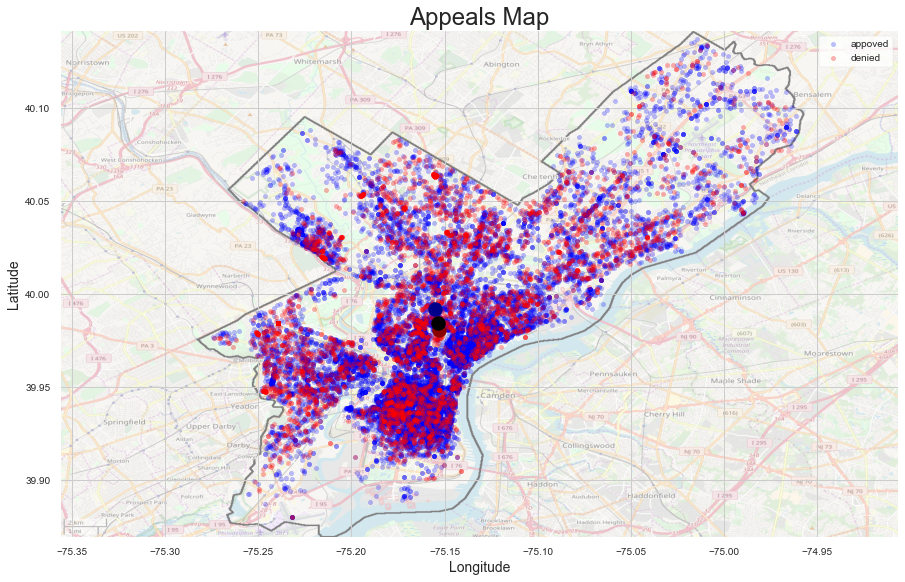

In [66]:
import numpy as np
import matplotlib.image as mpimg
philadelphia_img=mpimg.imread('images/Street_map_of_Philadelphia_and_surrounding_area.png')

plt.axes
plt.figure(figsize=(15,15))
plt.title('Appeals Map', size=24)
plt.rc('font', size=24)

plt.imshow(philadelphia_img, extent=[-75.356, -74.9066, 39.8694, 40.1414], alpha=0.5)

dfscat = df[df['newDecision'] == 'approved']
plt.scatter(dfscat['lng'], dfscat['lat'], marker = 'o', label = 'appoved', s=20, alpha=0.25, c='blue')

dfscat = df[df['newDecision'] == 'denied']
plt.scatter(dfscat['lng'], dfscat['lat'], marker = 'o', label = 'denied', s=20, alpha=0.3, c='red')

plt.scatter(centers.iloc[0][0], centers.iloc[0][1], c='darkred', s=200, alpha=1)
plt.scatter(centers.iloc[1][0], centers.iloc[1][1], c='darkblue', s=200, alpha=1)
plt.scatter(centers.iloc[2][0], centers.iloc[2][1], c='black', s=200, alpha=1)

plt.grid('on')
plt.legend()
plt.rc('font', size=18)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.savefig('images/appeal_map.png',bbox_inches='tight')
plt.show()

 

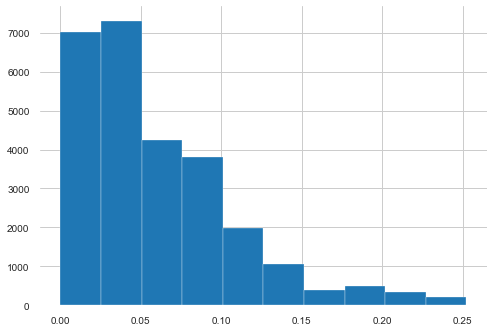

In [67]:
#Distance from CC
df['fromCC'].hist()

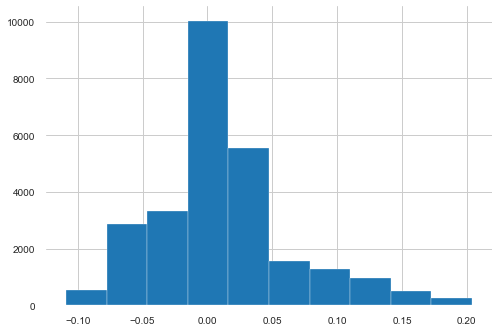

In [68]:
#Longtitude from CC
df['lngfromCC'].hist()

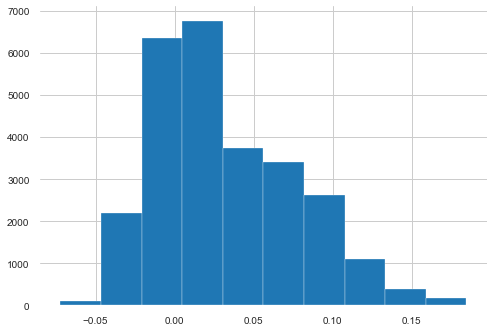

In [69]:
#Latitude from CC
df['latfromCC'].hist()

### myMetrics Function for model testing

In [101]:
# Create metrics function to check metrics for different models

def myMetrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None):
    
    hypertablerow={}
    hypertablerow['model']=model.__class__.__name__
    #print("Model:", model.__class__.__name__)
    hypertablerow['features']=features

    X_train_temp = X_train[features]
    X_test_temp = X_test[features]  
    print("X_train_temp.columns:", X_train_temp.columns)
    model.fit(X_train_temp,y_true_train)
    
    y_pred_test = model.predict(X_test_temp)
    y_pred_train = model.predict(X_train_temp)
    print("y_pred_test.value_counts:", pd.Series(y_pred_test).value_counts())
    print("y_pred_train.value_counts:", pd.Series(y_pred_train).value_counts())

    # F1 score
    hypertablerow['f1_score_test'] = metrics.f1_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test, average = 'weighted')
    print('f1_score_test', hypertablerow['f1_score_test'])
    hypertablerow['f1_score_train'] = metrics.f1_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train, average = 'weighted')
    print('f1_score_train', hypertablerow['f1_score_train'])
    # Accuracy
    hypertablerow['accuracy_test'] = metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test)
    print('accuracy_test', hypertablerow['accuracy_test'])
    hypertablerow['accuracy_train'] = metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train)
    print('accuracy_train', hypertablerow['accuracy_train'])
    # Precision
    hypertablerow['precision_test'] = metrics.precision_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test, average = 'weighted')
    #print('precision_test', hypertablerow['precision_test'])
    hypertablerow['precision_train'] = metrics.precision_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train, average = 'weighted')
    #print('precision_train', hypertablerow['precision_train'])
    # Recall
    hypertablerow['recall_test'] = metrics.recall_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test, average = 'weighted')
    #print('recall_test', hypertablerow['recall_test'])
    hypertablerow['recall_train'] = metrics.recall_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train, average = 'weighted')
    #print('recall_train', hypertablerow['recall_train'])

    hypertable.append(hypertablerow)
    pd.Series(hypertablerow)
    return hypertablerow

In [102]:
# Create "dummy" variables for systemofrecord columns
df = pd.concat([df, pd.get_dummies(df['systemofrecord'])], axis=1)
df.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng', 'decisionsv', 'provFlag',
       'newDecision', 'fromCenter', 'fromCC', 'latfromCC', 'lngfromCC',
       'ECLIPSE', 'HANSEN', 'ECLIPSE', 'HANSEN'],
      dtype='object')

In [103]:
# Declare an explanatory variable, and assign some data to it 
X = df.drop(['newDecision'], axis=1)

# Declare a response variable, the decision column of the df 
y = df['newDecision'] 

In [104]:
X.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng', 'decisionsv', 'provFlag',
       'fromCenter', 'fromCC', 'latfromCC', 'lngfromCC', 'ECLIPSE', 'HANSEN',
       'ECLIPSE', 'HANSEN'],
      dtype='object')

In [105]:
# import the preprocessing package
from sklearn import preprocessing

# Call the train_test_split() function
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [106]:
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train.size', y_train.size)
print('y_test.size', y_test.size)
print('y_train.value_counts',y_train.value_counts())
print('y_train.describe', y_test.value_counts())

X_train.shape (20151, 47)
X_test.shape (6717, 47)
y_train.size 20151
y_test.size 6717
y_train.value_counts approved    12515
other       4555 
denied      3081 
Name: newDecision, dtype: int64
y_train.describe approved    4130
other       1536
denied      1051
Name: newDecision, dtype: int64


In [107]:
#from sklearn import svm
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE', 'HANSEN']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [108]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
#model = KNeighborsClassifier(n_neighbors=10)
model = svm.LinearSVC() # Linear Kernel
#model = svm.SVC(kernel='poly') # Linear Kernel
features=['ECLIPSE']

y_true_train = y_train
y_true_test = y_test
print('y_true_test.value_counts()', y_true_test.value_counts())


hypertablerow={}
hypertablerow['model']=model.__class__.__name__
print("Model:", model.__class__.__name__)
hypertablerow['features']=features

X_train_temp = X_train[features]
X_test_temp = X_test[features]  
print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())

print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))

features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC']

X_train_temp = X_train[features]
X_test_temp = X_test[features]  

print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())


print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))


features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']

X_train_temp = X_train[features]
X_test_temp = X_test[features]  

print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())


print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))

y_true_test.value_counts() approved    4130
other       1536
denied      1051
Name: newDecision, dtype: int64
Model: LinearSVC
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE'], dtype='object')
y_pred_test.describe: approved    6717
dtype: int64
y_pred_train.describe: approved    20151
dtype: int64
Test Accuracy 0.6148578234330803
Train Accuracy 0.6210609895290556
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
y_pred_test.describe: approved    6714
other       3   
dtype: int64
y_pred_train.describe: approved    20137
other       14   
dtype: int64
Test Accuracy 0.6147089474467768
Train Accuracy 0.6206143615701454
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC',
       'censustract'],
      dtype='object')
y_pred_test.describe: approved    6717
dtype: int64
y_pred_train.describe: approved    20151
dtype: int64
Test Accuracy 0.6148578234330803
Train Accuracy 0.6210609895290556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [109]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=10)
#model = svm.LinearSVC() # Linear Kernel
model = svm.SVC(kernel='poly', degree=2) # Poy Kernel - takes VERY LONG time
features=['ECLIPSE']

y_true_train = y_train
y_true_test = y_test
print('y_true_test.value_counts()', y_true_test.value_counts())


hypertablerow={}
hypertablerow['model']=model.__class__.__name__
print("Model:", model.__class__.__name__)
hypertablerow['features']=features

X_train_temp = X_train[features]
X_test_temp = X_test[features]  
print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())

print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))

features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC']

X_train_temp = X_train[features]
X_test_temp = X_test[features]  

print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())


print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))


features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']

X_train_temp = X_train[features]
X_test_temp = X_test[features]  

print("X_train_temp.columns:", X_train_temp.columns)
model.fit(X_train_temp,y_true_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
print("y_pred_test.describe:", pd.Series(y_pred_test).value_counts())
print("y_pred_train.describe:", pd.Series(y_pred_train).value_counts())


print('Test Accuracy', metrics.accuracy_score(y_true=y_true_test.to_numpy(), y_pred=y_pred_test))
print('Train Accuracy', metrics.accuracy_score(y_true=y_true_train.to_numpy(), y_pred=y_pred_train))

y_true_test.value_counts() approved    4130
other       1536
denied      1051
Name: newDecision, dtype: int64
Model: SVC
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE'], dtype='object')
y_pred_test.describe: approved    6717
dtype: int64
y_pred_train.describe: approved    20151
dtype: int64
Test Accuracy 0.6148578234330803
Train Accuracy 0.6210609895290556
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
y_pred_test.describe: approved    6717
dtype: int64
y_pred_train.describe: approved    20151
dtype: int64
Test Accuracy 0.6148578234330803
Train Accuracy 0.6210609895290556
X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC',
       'censustract'],
      dtype='object')
y_pred_test.describe: approved    6717
dtype: int64
y_pred_train.describe: approved    20151
dtype: int64
Test Accuracy 0.6148578234330803
Train Accuracy 0.6210609895290556


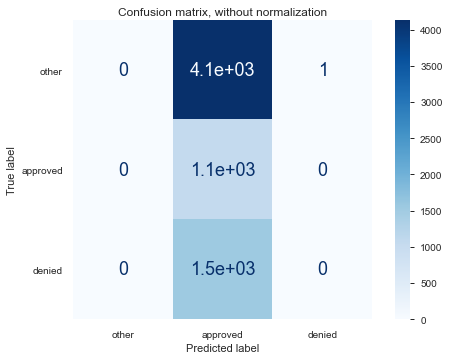

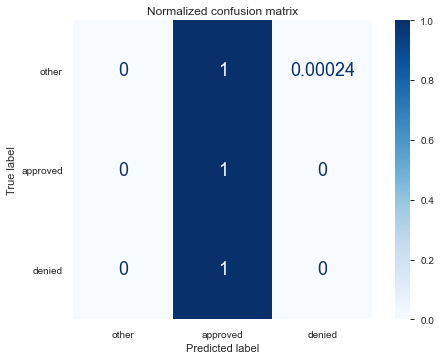

In [134]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_temp, y_true_test,
                                 display_labels=y_true_test.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#    print(title)
#    print(disp.confusion_matrix)

plt.show()


In [111]:
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [112]:
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [113]:
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [114]:
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [115]:
#model = svm.LinearSVC() # Linear Kernel
#features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [116]:
#model = svm.SVC(kernel='linear') # Linear Kernel
#features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [117]:
#model = svm.SVC(kernel='poly') # Linear Kernel
#features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [118]:
#model = svm.SVC(kernel='sigmoid') # Linear Kernel
#features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [119]:
#model = svm.SVC(kernel='rbf') # Linear Kernel
#features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
#hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
features=['ECLIPSE']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE'], dtype='object')
y_pred_test.value_counts: approved    6717
dtype: int64
y_pred_train.value_counts: approved    20151
dtype: int64
f1_score_test 0.468214771047962
f1_score_train 0.4758818517085736
accuracy_test 0.6148578234330803
accuracy_train 0.6210609895290556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
y_pred_test.value_counts: approved    5591
other       720 
denied      406 
dtype: int64
y_pred_train.value_counts: approved    16901
other       2064 
denied      1186 
dtype: int64
f1_score_test 0.55043735053493
f1_score_train 0.6219689542150261
accuracy_test 0.6092005359535507
accuracy_train 0.6725720807900353


In [122]:
features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'censustract']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC',
       'censustract'],
      dtype='object')
y_pred_test.value_counts: approved    5596
other       700 
denied      421 
dtype: int64
y_pred_train.value_counts: approved    16823
other       2097 
denied      1231 
dtype: int64
f1_score_test 0.5534172478076753
f1_score_train 0.6219059381285543
accuracy_test 0.6118803037070121
accuracy_train 0.671629199543447


In [123]:
features=['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'censustract', 'fromCenter']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'censustract',
       'fromCenter'],
      dtype='object')
y_pred_test.value_counts: approved    5606
other       684 
denied      427 
dtype: int64
y_pred_train.value_counts: approved    16808
other       2125 
denied      1218 
dtype: int64
f1_score_test 0.554957915301909
f1_score_train 0.622447278284942
accuracy_test 0.6138156915289564
accuracy_train 0.6717780755297503


In [124]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
features=['ECLIPSE']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE'], dtype='object')
y_pred_test.value_counts: approved    6717
dtype: int64
y_pred_train.value_counts: approved    20151
dtype: int64
f1_score_test 0.468214771047962
f1_score_train 0.4758818517085736
accuracy_test 0.6148578234330803
accuracy_train 0.6210609895290556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
y_pred_test.value_counts: approved    4524
denied      1835
other       358 
dtype: int64
y_pred_train.value_counts: approved    13561
denied      5580 
other       1010 
dtype: int64
f1_score_test 0.48463605489604045
f1_score_train 0.49947821297160916
accuracy_test 0.5125800208426381
accuracy_train 0.5267232395414619


In [126]:
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC',
       'censustract'],
      dtype='object')
y_pred_test.value_counts: approved    4432
denied      2215
other       70  
dtype: int64
y_pred_train.value_counts: approved    13367
denied      6611 
other       173  
dtype: int64
f1_score_test 0.4709790763021281
f1_score_train 0.48175783701230945
accuracy_test 0.507815989280929
accuracy_train 0.5196764428564339


In [127]:
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract', 'fromCenter']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'censustract',
       'fromCenter'],
      dtype='object')
y_pred_test.value_counts: approved    4476
denied      2171
other       70  
dtype: int64
y_pred_train.value_counts: approved    13382
denied      6596 
other       173  
dtype: int64
f1_score_test 0.47273142234418575
f1_score_train 0.48234752174442536
accuracy_test 0.511091260979604
accuracy_train 0.5202719468016476


In [128]:
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'fromCenter']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

X_train_temp.columns: Index(['ECLIPSE', 'ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'fromCenter'], dtype='object')
y_pred_test.value_counts: approved    4518
denied      1813
other       386 
dtype: int64
y_pred_train.value_counts: approved    13445
denied      5510 
other       1196 
dtype: int64
f1_score_test 0.4909717626156108
f1_score_train 0.5032913666040222
accuracy_test 0.5163019205002233
accuracy_train 0.5256811076373381


Confusion matrix, without normalization
[[   0 4129    1]
 [   0 1051    0]
 [   0 1536    0]]
Normalized confusion matrix
[[0.00e+00 1.00e+00 2.42e-04]
 [0.00e+00 1.00e+00 0.00e+00]
 [0.00e+00 1.00e+00 0.00e+00]]


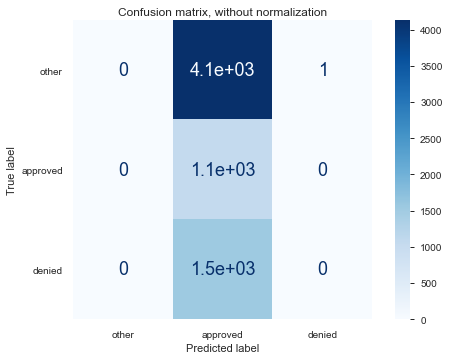

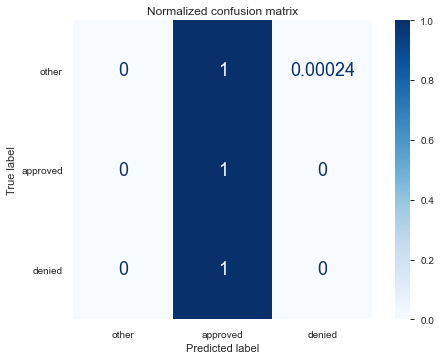

In [129]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_temp, y_true_test,
                                 display_labels=y_true_test.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

...

In [131]:
pd.DataFrame(hypertable).to_csv('hypertable.csv')
dfhypertable=pd.DataFrame(hypertable).sort_values('precision_test')
pd.set_option('display.max_colwidth', -1)
dfhypertable.sort_values('f1_score_test',  ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,model,features,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_score_test,f1_score_train
12,KNeighborsClassifier,"[ECLIPSE, fromCC, latfromCC, lngfromCC, censustract, fromCenter]",0.613816,0.671778,0.551275,0.641163,0.613816,0.671778,0.554958,0.622447
11,KNeighborsClassifier,"[ECLIPSE, fromCC, latfromCC, lngfromCC, censustract]",0.611880,0.671629,0.549114,0.640349,0.611880,0.671629,0.553417,0.621906
10,KNeighborsClassifier,"[ECLIPSE, fromCC, latfromCC, lngfromCC]",0.609201,0.672572,0.544479,0.643215,0.609201,0.672572,0.550437,0.621969
17,GaussianNB,"[ECLIPSE, fromCC, latfromCC, lngfromCC, fromCenter]",0.516302,0.525681,0.501713,0.517354,0.516302,0.525681,0.490972,0.503291
14,GaussianNB,"[ECLIPSE, fromCC, latfromCC, lngfromCC]",0.512580,0.526723,0.489277,0.510596,0.512580,0.526723,0.484636,0.499478
16,GaussianNB,"[ECLIPSE, fromCC, latfromCC, lngfromCC, censustract, fromCenter]",0.511091,0.520272,0.498856,0.513504,0.511091,0.520272,0.472731,0.482348
15,GaussianNB,"[ECLIPSE, fromCC, latfromCC, lngfromCC, censustract]",0.507816,0.519676,0.498945,0.513064,0.507816,0.519676,0.470979,0.481758
13,GaussianNB,[ECLIPSE],0.614858,0.621061,0.378050,0.385717,0.614858,0.621061,0.468215,0.475882
9,KNeighborsClassifier,[ECLIPSE],0.614858,0.621061,0.378050,0.385717,0.614858,0.621061,0.468215,0.475882
0,KNeighborsClassifier,[ECLIPSE],0.614858,0.621061,0.378050,0.385717,0.614858,0.621061,NaN,NaN
